In [1]:
import requests
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghorbaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
url='https://medium.com/@mijordan3/artificial-intelligence-the-revolution-hasnt-happened-yet-5e1d5812e1e7'

In [4]:
r = requests.get(url)
print(r.text)

<!DOCTYPE html><html xmlns:cc="http://creativecommons.org/ns#"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# medium-com: http://ogp.me/ns/fb/medium-com#"><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=contain"><title>Artificial Intelligence — The Revolution Hasn’t Happened Yet</title><link rel="canonical" href="https://medium.com/@mijordan3/artificial-intelligence-the-revolution-hasnt-happened-yet-5e1d5812e1e7"><meta name="title" content="Artificial Intelligence — The Revolution Hasn’t Happened Yet"><meta name="referrer" content="unsafe-url"><meta name="description" content="Artificial Intelligence (AI) is the mantra of the current era. The phrase is intoned by technologists, academicians, journalists and venture capitalists alike. As with many phrases that cross over…"><meta name="theme-color" content="#000000"><meta property="og:title" content="Artificial Intelligence

In [5]:
soup = BeautifulSoup(r.text, "html5lib")
soup

<!DOCTYPE html>
<html xmlns:cc="http://creativecommons.org/ns#"><head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# medium-com: http://ogp.me/ns/fb/medium-com#"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1.0, viewport-fit=contain" name="viewport"/><title>Artificial Intelligence — The Revolution Hasn’t Happened Yet</title><link href="https://medium.com/@mijordan3/artificial-intelligence-the-revolution-hasnt-happened-yet-5e1d5812e1e7" rel="canonical"/><meta content="Artificial Intelligence — The Revolution Hasn’t Happened Yet" name="title"/><meta content="unsafe-url" name="referrer"/><meta content="Artificial Intelligence (AI) is the mantra of the current era. The phrase is intoned by technologists, academicians, journalists and venture capitalists alike. As with many phrases that cross over…" name="description"/><meta content="#000000" name="theme-color"/><meta content="Artificial Intelligence — The Revol

In [6]:
for script in soup(["script", "style", 'aside']):
    script.extract()
text=" ".join(re.split(r'[\n\t]+', soup.get_text()))

In [7]:
text

'Artificial Intelligence — The Revolution Hasn’t Happened YetHomepageHomepageArtificial IntelligenceBecome a memberSign inGet startedLoading…0:0022:31Photo credit: Peg SkorpinskiArtificial Intelligence\u200a—\u200aThe Revolution Hasn’t Happened\xa0YetMichael JordanBlockedUnblockFollowFollowingApr 18, 2018Artificial Intelligence (AI) is the mantra of the current era. The phrase is intoned by technologists, academicians, journalists and venture capitalists alike. As with many phrases that cross over from technical academic fields into general circulation, there is significant misunderstanding accompanying the use of the phrase. But this is not the classical case of the public not understanding the scientists\u200a—\u200ahere the scientists are often as befuddled as the public. The idea that our era is somehow seeing the emergence of an intelligence in silicon that rivals our own entertains all of us\u200a—\u200aenthralling us and frightening us in equal measure. And, unfortunately, it di

In [8]:
text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
text=re.sub(r"\b\d+\b", "", text)

In [9]:
text

'Artificial Intelligence — The Revolution Hasn’t Happened YetHomepageHomepageArtificial IntelligenceBecome a memberSign inGet startedLoading…::31Photo credit: Peg SkorpinskiArtificial Intelligence\u200a—\u200aThe Revolution Hasn’t Happened\xa0YetMichael JordanBlockedUnblockFollowFollowingApr , 2018Artificial Intelligence (AI) is the mantra of the current era. The phrase is intoned by technologists, academicians, journalists and venture capitalists alike. As with many phrases that cross over from technical academic fields into general circulation, there is significant misunderstanding accompanying the use of the phrase. But this is not the classical case of the public not understanding the scientists\u200a—\u200ahere the scientists are often as befuddled as the public. The idea that our era is somehow seeing the emergence of an intelligence in silicon that rivals our own entertains all of us\u200a—\u200aenthralling us and frightening us in equal measure. And, unfortunately, it distracts

In [18]:
# https://www.datacamp.com/community/tutorials/web-scraping-python-nlp
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    
    #### NEW TEXT
    for script in soup(["script", "style", 'aside']):
        script.extract()
    text=" ".join(re.split(r'[\n\t]+', soup.get_text()))
    
    # Get the text out of the soup and print it
    text = soup.get_text()
    
    #Removing all the numbers
#     text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
#     text=re.sub(r"\b\d+\b", "", text)
    
    #print(text)
    
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    plt.figure(figsize=(10, 5))
    plt.title(url)

    freqdist1.plot(20)
    
    return(freqdist1)

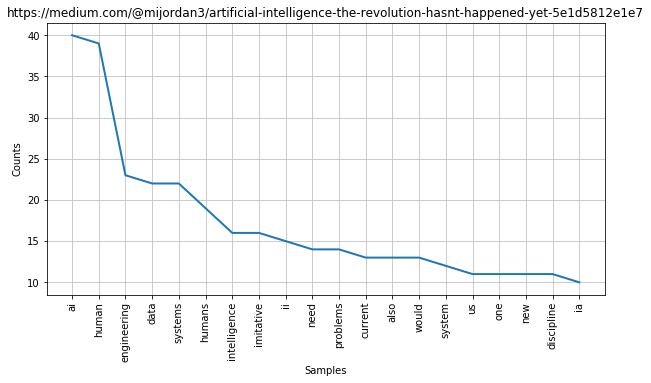

FreqDist({'ai': 40, 'human': 39, 'engineering': 23, 'data': 22, 'systems': 22, 'humans': 19, 'intelligence': 16, 'imitative': 16, 'ii': 15, 'need': 14, ...})

In [19]:
plot_word_freq('https://medium.com/@mijordan3/artificial-intelligence-the-revolution-hasnt-happened-yet-5e1d5812e1e7')

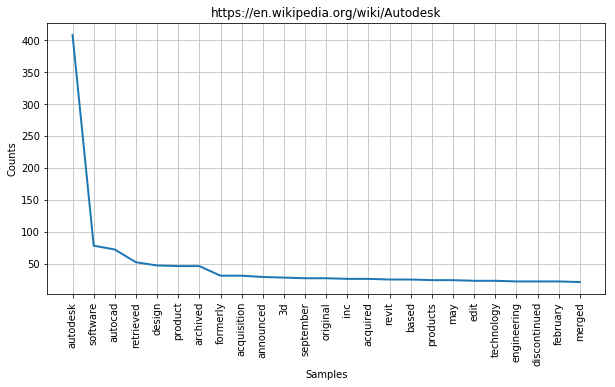

In [28]:
adsk=plot_word_freq('https://en.wikipedia.org/wiki/Autodesk')

In [24]:
from google import google
num_page = 1
search_results = google.search("Hulu", num_page)

In [25]:
# GoogleResult:
#     self.name # The title of the link
#     self.link # The external link
#     self.google_link # The google link
#     self.description # The description of the link
#     self.thumb # The link to a thumbnail of the website (NOT implemented yet)
#     self.cached # A link to the cached version of the page
#     self.page # What page this result was on (When searching more than one page)
#     self.index # What index on this page it was on
#     self.number_of_results # The total number of results the query returned


for item in search_results:
    print(item.link,'\n-----')

https://www.hulu.com/ 
-----
https://www.youtube.com/user/huluDotCom 
-----
None 
-----
https://en.wikipedia.org/wiki/Hulu 
-----
https://itunes.apple.com/us/app/hulu-watch-tv-shows-movies/id376510438?mt=8 
-----


In [22]:
search_results[0].link

'https://www.philzcoffee.com/'

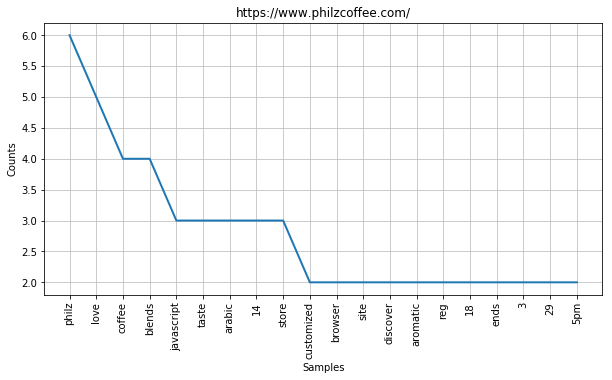

FreqDist({'philz': 6, 'love': 5, 'coffee': 4, 'blends': 4, 'javascript': 3, 'taste': 3, 'arabic': 3, '14': 3, 'store': 3, 'customized': 2, ...})

In [23]:
plot_word_freq(search_results[0].link)

In [32]:
url2 = 'https://generalassemb.ly/locations/san-francisco'
# Make the request and check object type
r2 = requests.get(url2)
# Extract HTML from Response object and print
html2 = r2.text
# Create a BeautifulSoup object from the HTML
soup2 = BeautifulSoup(html2, "html5lib")
text = soup2.get_text()

text

'\n\n\n\n  if (!window.cookieConsent) {\n    window.cookieConsent = new CookieConsent()\n    window.cookieConsent.initBrowser()\n  }\n\n\n\n\n\nwindow.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"44a7295480","applicationID":"63471370","transactionName":"dg1aRxMMCghUEBlVXFYDQFoODRVLQgpZTmxYB0BBDg==","queueTime":2,"applicationTime":324,"agent":""}\n(window.NREUM||(NREUM={})).loader_config={xpid:"VQAPVFJWCRAGV1VVBgIAVg=="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(16),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.in

In [34]:
#^\d{5}(?:[-\s]\d{4})?$
zipcode = re.findall('[0-9]{5}', text)
zipcode

['72954',
 '63471',
 '47424',
 '55120',
 '82455',
 '58564',
 '61725',
 '37283',
 '18018',
 '95113',
 '94104',
 '24086',
 '94103',
 '94103',
 '20152']

In [35]:
adresses3 = re.findall('\d{1,3}.?\d{0,3}\s[a-zA-Z]{2,30}\s[a-zA-Z]{2,15}',str(soup2))
print(adresses3)

['1158 Howard Street', '1158 Howard Street', '1158 Howard Street', '1158 Howard Street', '225 Bush Street', '225 Bush Street', '1158 Howard Street', '2019\nGeneral Assembly']
